<a href="https://colab.research.google.com/github/BranislavMajernik/qcomp/blob/main/QbSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.2-py3-none-any.whl size=144547 sha256=7ff2893040c93c113da8aa660cfdbd2671742cde83c0a9767792147b2cb04898
  Stored in directory: /root/.cache/pip/wheels/af/c8/1f/dd6d90c5974896e85709e017986a6f72fcf32343bea042bc03
  Cre

In [8]:
import numpy as np
import strawberryfields as sf
from strawberryfields.ops import *

In [12]:
prog = sf.Program(3)

with prog.context as q:
    # State preparation in Blackbird
    #Fock(1) | q[0]
    Coherent(0.5, 2) | q[1]

eng = sf.LocalEngine(backend='gaussian')
result = eng.run(prog)
print(result)

<Result: shots=0, num_modes=0, contains state=True>


In [35]:
field = np.round(np.random.rand(4, 2), 2)
field

array([[0.16, 0.16],
       [0.06, 0.87],
       [0.6 , 0.71],
       [0.02, 0.97]])

In [34]:
p = 0.7 ### Bernoulli boolean density parameter
np.random.seed(42)
A = np.random.choice(a=[1,0], size=(1, 4), p=[p, 1-p])
AA = (A[0].tolist())


In [14]:
classes = [1,0,1,0]
fig = plot.points(field,AA)
fig

NameError: ignored

In [15]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        #y_ = np.where(y <= 0, -1, 1)
        y_ = y

        # init weights
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [43]:
F_scaled = StandardScaler().fit_transform(field)  # Transform data to zero mean and unit variance

#classifier = LinearSVC()
clf = SVM()
clf.fit(F_scaled, AA)
#score = classifier.score(F_scaled, AA)
#print("Score: ", score)
ypred = clf.predict(np.round(np.random.rand(4, 2), 2))

#cm = confusion_matrix(F_scaled, ypred)
print(ypred)
X = field
y = AA

[1. 1. 1. 1.]


In [ ]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    print("SVM classification accuracy", accuracy(y_test, ypred))

In [26]:
import matplotlib.pyplot as plt

In [31]:
def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

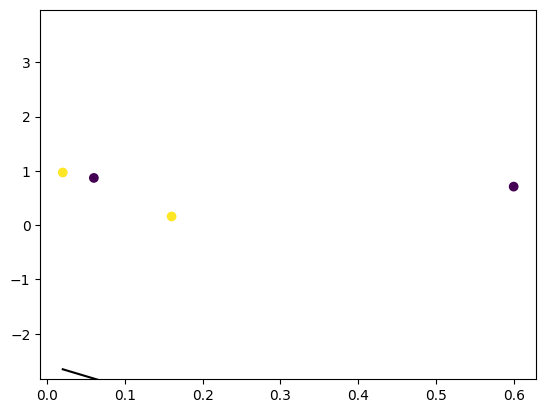

In [44]:
visualize_svm()

In [23]:
w = classifier.coef_[0]
i = classifier.intercept_[0]

m = -w[0] / w[1]  # finding the values for y = mx + b
b = -i / w[1]

xx = [-1, 1]
yy = [m * x + b for x in xx]

fig = plot.points(F_scaled, AA)
fig.add_trace(plotly.graph_objects.Scatter(x=xx, y=yy, mode="lines"))

fig

AttributeError: ignored

In [3]:
from strawberryfields.apps import data, plot, similarity

m0 = data.Mutag0()
m1 = data.Mutag1()
m2 = data.Mutag2()
m3 = data.Mutag3()

In [6]:
m0_a = m0.adj
m1_a = m1.adj
m2_a = m2.adj
m3_a = m3.adj
print(m0[0])

[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
import networkx as nx
import plotly

In [8]:
plot.graph(nx.Graph(m0_a))

Error: ignored

Figure({
    'data': [{'hoverinfo': 'none',
              'line': {'color': '#CDCDCD', 'width': 1},
              'mode': 'lines',
              'type': 'scatter',
              'x': [0.110674920082051, 0.3325180282834503, None,
                    0.110674920082051, -0.10573201244961432, None,
                    0.3325180282834503, 0.31837796868650325, None,
                    0.31837796868650325, 0.10817894656323575, None,
                    0.10817894656323575, -0.12582061581173917, None,
                    0.10817894656323575, 0.0894455161612303, None,
                    -0.12582061581173917, -0.10573201244961432, None,
                    -0.12582061581173917, -0.3568360682696025, None,
                    -0.3568360682696025, -0.3746946767622437, None,
                    -0.3746946767622437, -0.1620150714200042, None,
                    -0.1620150714200042, 0.0894455161612303, None,
                    -0.1620150714200042, -0.17957964910137444, None,
                    0.0894455161612303, 0.26395816618407464, None,
                    0.26395816618407464, 0.23288582259230264, None,
                    0.23288582259230264, -0.004090002015534116, None,
                    -0.004090002015534116, -0.17957964910137444, None,
                    -0.004090002015534116, -0.038531130421250656, None,
                    -0.038531130421250656, -0.23867208087265568, None,
                    -0.038531130421250656, 0.12993193857117113, None],
              'y': [0.910961334153033, 0.7623231588277425, None,
                    0.910961334153033, 0.7584892195635954, None,
                    0.7623231588277425, 0.5002924896086176, None,
                    0.5002924896086176, 0.3325831579704782, None,
                    0.3325831579704782, 0.4940021409430782, None,
                    0.3325831579704782, 0.061870831947271526, None,
                    0.4940021409430782, 0.7584892195635954, None,
                    0.4940021409430782, 0.3575453539641615, None,
                    0.3575453539641615, 0.09278291481906589, None,
                    0.09278291481906589, -0.07160734861438507, None,
                    -0.07160734861438507, 0.061870831947271526, None,
                    -0.07160734861438507, -0.33762664558407807, None,
                    0.061870831947271526, -0.1433893108727436, None,
                    -0.1433893108727436, -0.4054751685172856, None,
                    -0.4054751685172856, -0.5422076935972373, None,
                    -0.5422076935972373, -0.33762664558407807, None,
                    -0.5422076935972373, -0.8029177607055883, None,
                    -0.8029177607055883, -0.9676266739057261, None,
                    -0.8029177607055883, -1.0, None]},
             {'hoverinfo': 'text',
              'marker': {'color': '#3e9651', 'line': {'width': 2}, 'size': 14},
              'mode': 'markers',
              'text': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
              'type': 'scatter',
              'x': [0.110674920082051, 0.3325180282834503, 0.31837796868650325,
                    0.10817894656323575, -0.12582061581173917,
                    -0.10573201244961432, -0.3568360682696025, -0.3746946767622437,
                    -0.1620150714200042, 0.0894455161612303, 0.26395816618407464,
                    0.23288582259230264, -0.004090002015534116,
                    -0.17957964910137444, -0.038531130421250656,
                    -0.23867208087265568, 0.12993193857117113],
              'y': [0.910961334153033, 0.7623231588277425, 0.5002924896086176,
                    0.3325831579704782, 0.4940021409430782, 0.7584892195635954,
                    0.3575453539641615, 0.09278291481906589, -0.07160734861438507,
                    0.061870831947271526, -0.1433893108727436, -0.4054751685172856,
                    -0.5422076935972373, -0.33762664558407807, -0.8029177607055883,
                    -0.9676266739057261, -1.0]}],
    'layout': {'height': 500,
        

In [9]:
print(similarity.sample_to_orbit(m0[0]))

[1, 1]
